Data Collection

In [34]:
# Importing pandas library
import pandas as pd 

# Reading the csv file
df = pd.read_csv("IMDB Dataset.csv")

Data viewing

In [35]:
# Displaying the first 5 rows of the dataframe
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [36]:
# Displaying the first review from the "review" column
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [37]:
# Displaying the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [38]:
# Counting the number of positive and negative reviews
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [39]:
# Counting the number of duplicated rows
df.duplicated().value_counts()

False    49582
True       418
Name: count, dtype: int64

Data Preprocessing

In [40]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [41]:
# Check if removing worked
df.duplicated().value_counts()

False    49582
Name: count, dtype: int64

In [42]:
import string
import nltk
from nltk.corpus import stopwords
# to remove stopwords later
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swt4fe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swt4fe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
# make review column lowercase
df['review'] = df['review'].str.lower()

In [44]:
# delete the punctoation
df['review'] = df['review'].str.translate(str.maketrans("", "", string.punctuation))

In [45]:
 #Check if all is lowercase, <br> are removed and also punctoation
df["review"][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [46]:
# Removing English stopwords from the "review" column
stop_words = set(stopwords.words("english"))
df['review'] = df['review'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

In [48]:
# Mapping "positive" and "negative" values to 1 and 0 respectively
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [50]:
from nltk import word_tokenize
# Tokenize the review column
df['review'] = df['review'].apply(lambda x: word_tokenize(x))

In [51]:
from nltk.stem import PorterStemmer
# Stemming words in the "review" column using Porter Stemmer algorithm
stemmer = PorterStemmer()
df['review'] = df['review'].apply(lambda x: [stemmer.stem(word) for word in x])

In [52]:
# Joining the stemmed words back into a string
df['review'] = df['review'].apply(lambda x: ' '.join(x))

# Displaying the dataframe
df

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product br br film techniqu unass...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job wasnt creativ orig...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,im go disagre previou comment side maltin one ...,0


In [53]:
# Reset the index after some rows were deleted
df = df.reset_index()

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified train/test split (0.7/0.3)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# stratified train/test split (0.7/0.3)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the indices of the split
for train_index, test_index in sss.split(df.index, df['sentiment']):
    X_train, X_test = df['review'].iloc[train_index], df['review'].iloc[test_index]
    y_train, y_test = df['sentiment'].iloc[train_index], df['sentiment'].iloc[test_index]
    X_test = pd.DataFrame({'review': X_test})
    X_test.reset_index(drop=True, inplace=True)
    y_test = pd.DataFrame({'sentiment': y_test})
    y_test.reset_index(drop=True, inplace=True)
    # test into val and test (0.2/0.1)
    sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
    for test_index, val_index in sss2.split(X_test.index, y_test):
        X_test2, X_val = X_test['review'].iloc[test_index], X_test['review'].iloc[val_index]
        y_test2, y_val = y_test['sentiment'].iloc[test_index], y_test['sentiment'].iloc[val_index]

# Save each split in a separate file
train = pd.DataFrame({'review': X_train, 'sentiment': y_train})
val = pd.DataFrame({'review': X_val, 'sentiment': y_val})
test = pd.DataFrame({'review': X_test2, 'sentiment': y_test2})

train.to_csv('preprocessed/train.csv', index=False) # Save training data to a csv file
val.to_csv('preprocessed/val.csv', index=False) # Save validation data to a csv file
test.to_csv('preprocessed/test.csv', index=False) # Save testing data to a csv file


In [58]:
train

,review,sentiment
19449,work librari expect like movi came 5 year ago ...,1
18231,eagl wing pleasant surpris movi keep viewer in...,1
29156,new york love collect work eleven short film s...,1
10729,saw movi yesterday night one best made tv film...,1
27202,playwright sidney bruhl wonder overthetop mich...,1
...,...,...
31820,love movi tv program record come nov 2nd reall...,1
35071,big jim carey fan took seat cinema optim fun d...,0
24995,even 6000 buck cast parttim actor christoph no...,1
29352,one best movi ive ever seen good act hank newm...,1


In [59]:
import pandas as pd
train = pd.read_csv('preprocessed/train.csv')
val = pd.read_csv('preprocessed/val.csv')
test = pd.read_csv('preprocessed/test.csv')

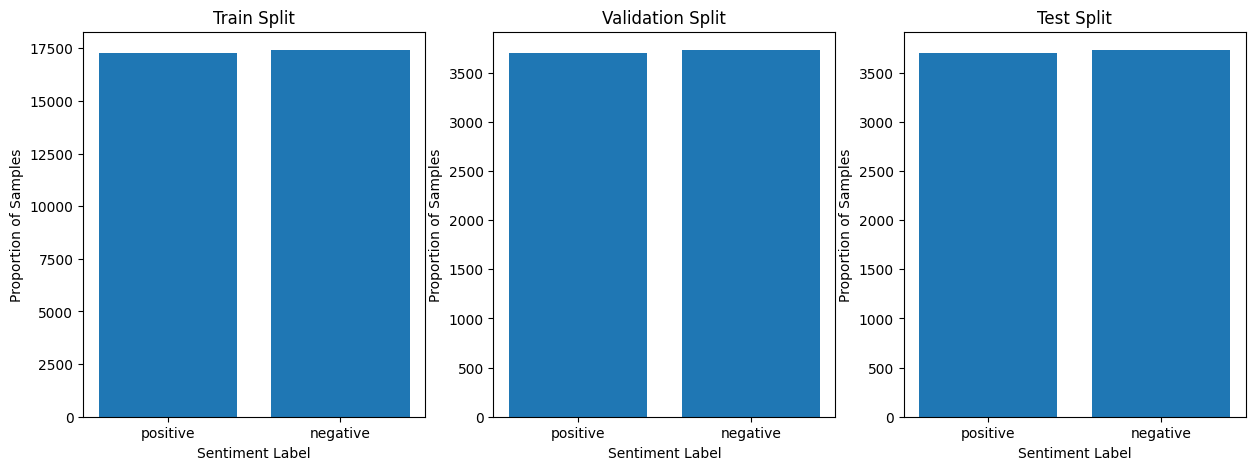

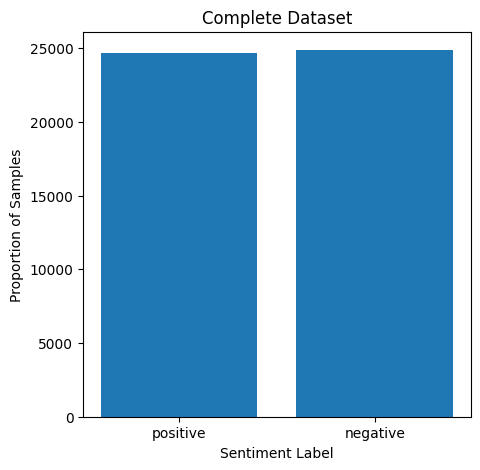

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution of sentiment labels in each split
train_counts = np.bincount(train['sentiment'].astype(int))
val_counts = np.bincount(val['sentiment'].astype(int))
test_counts = np.bincount(test['sentiment'].astype(int))

# Get the proportions of positive and negative sentiment labels
train_proportions = train_counts #/ train_counts.sum()
val_proportions = val_counts #/ val_counts.sum()
test_proportions = test_counts# / test_counts.sum()

# Plot the bar charts for the splits
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(['positive', 'negative'], train_proportions)
ax[1].bar(['positive', 'negative'], val_proportions)
ax[2].bar(['positive', 'negative'], test_proportions)

# Add labels and title to each chart
ax[0].set_title('Train Split')
ax[1].set_title('Validation Split')
ax[2].set_title('Test Split')
for i in range(3):
    ax[i].set_xlabel('Sentiment Label')
    ax[i].set_ylabel('Proportion of Samples')

# Plot the distribution of sentiment labels in the complete dataset
df_counts = np.bincount(df['sentiment'].astype(int))
df_proportions = df_counts #/ df_counts.sum()

fig2, ax2 = plt.subplots(1, 1, figsize=(5, 5))
ax2.bar(['positive', 'negative'], df_proportions)
ax2.set_title('Complete Dataset')
ax2.set_xlabel('Sentiment Label')
ax2.set_ylabel('Proportion of Samples')
plt.show()


From here on only experiments where done, for sentiment analysis with machine learning models go to:

- sentiment_annlysis_using_bert
- sentiment_analysis_using_different_techniques

In [23]:
!pip install transformers


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
print(f"Train input shape: {train_inputs.shape}")
print(f"Train label shape: {train_labels.shape}")
print(f"Val input shape: {val_inputs.shape}")
print(f"Val label shape: {val_labels.shape}")
print(f"Test input shape: {test_inputs.shape}")
print(f"Test label shape: {test_labels.shape}")

Train input shape: torch.Size([34707, 512])
Train label shape: torch.Size([34707])
Val input shape: torch.Size([7438, 512])
Val label shape: torch.Size([7438])
Test input shape: torch.Size([7437, 512])
Test label shape: torch.Size([7437])


From here on only experiments for sentiment analysis where done. Running sentiment analysis using Transformers can be found in sentiment_analysis2.ipynb notebook

In [3]:
from transformers import AutoTokenizer

# Load DistilBERT tokenizer and tokenize (encode) the texts
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

c:\Users\timos\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
# Tokenize and encode the dataset
def tokenize(batch):
    tokenized_batch = tokenizer(batch, padding=True, truncation=True, max_length=128)
    return tokenized_batch
train_data = tokenize(list(train["review"]))
train_labels = list(train["sentiment"])
val_data = tokenize(list(val["review"]))
val_labels = list(val["sentiment"])
     

In [23]:
import torch
def to_inputs_and_labels(sample, label):
    print(sample)
    input_ids, attention_mask = sample["input_ids"], sample["attention_mask"]
    return (torch.tensor(input_ids), torch.tensor(attention_mask), torch.tensor(label))

train_data = map(lambda x, y: to_inputs_and_labels(x, y), train_data, train_labels)
val_data = map(lambda x, y: to_inputs_and_labels(x, y), val_data, val_labels)


In [35]:

from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

# Instantiate a data collator with dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Create data loaders for to reshape data for PyTorch model
train_dataloader = DataLoader(
    train_data, shuffle=True, batch_size=8, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    val_data, batch_size=8, collate_fn=data_collator
)

In [36]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AutoModelForSequenceClassification

# Dynamically set number of class labels based on dataset
num_labels = 2
print(f"Number of labels: {num_labels}")

# Load model from checkpoint
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", 
                                                           num_labels=num_labels)
     

Number of labels: 2


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_clas

In [37]:
from transformers import AdamW
from transformers import get_scheduler

# Model parameters
learning_rate = 5e-5
num_epochs = 5

# Create the optimizer
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Further define learning rate scheduler
num_training_batches = len(train_dataloader)
num_training_steps = num_epochs * num_training_batches
lr_scheduler = get_scheduler(
    "linear",                   # linear decay
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)

c:\Users\timos\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [31]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

# Train the model with PyTorch training loop
model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/5 [00:00<?, ?it/s]You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


AttributeError: 'list' object has no attribute 'keys'

In [2]:
from transformers import AutoModel
model = AutoModel.from_pretrained("distilbert-base-uncased")

c:\Users\timos\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification

In [3]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [6]:
from transformers import DistilBertTokenizerFast

# Load the BERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=sent,  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=64,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [9]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch

train_inputs, train_masks = preprocessing_for_bert(train["review"])
val_inputs, val_masks = preprocessing_for_bert(val["review"])
train_labels = torch.tensor(train["sentiment"])
val_labels = torch.tensor(val["sentiment"])

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)


c:\Users\timos\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [22]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)
# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = model

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

CPU times: total: 1.06 s
Wall time: 1.32 s


In [11]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [28]:
import random
import time
import torch.nn as nn
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    print("Start training...\n")
    for epoch_i in range(epochs):
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)
        t0_epoch, t0_batch = time.time(), time.time()
        total_loss, batch_loss, batch_counts = 0, 0, 0
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            print(b_input_ids)
            print(b_attn_mask)
            logits = model(input_ids=b_input_ids, attention_mask=b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                time_elapsed = time.time() - t0_batch
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        if evaluation == True:
            val_loss, val_accuracy = evaluate(model, val_dataloader)
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [15]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [29]:
import numpy as np 
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
tensor([[  101, 22063, 11019,  ...,  2072,  2034,   102],
        [  101, 14689,  4747,  ..., 10024,  3089,   102],
        [  101, 24560,  9587,  ...,  2028, 19337,   102],
        ...,
        [  101,  9587,  5737,  ...,  5856,  2615,   102],
        [  101,  6415,  4115,  ...,  9587,  5737,   102],
        [  101,  3305,  2391,  ..., 28426,  2895,   102]])
tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])


IndexError: too many indices for tensor of dimension 2